In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy import optimize

### 1) 
The end result is that dish zenith.txt contains the (x,y,z) positions in mm of a few hundred targets placed on the dish. The ideal telescope dish should be a rotationally symmetric paraboloid. We will try to measure the shape of that paraboloid, and see how well we did.

#### a) 
Helpfully, I have oriented the points in the file so that the dish is pointing in the +z direction (in the general problem, you would have to fit for direction the dish is pointing in as well, but we will skip that here). For a rotationally symmetric paraboloid, we know that   
$z-z_0 = a ((x - x_0)^2 + (y - y_0)^2)$   
and we need to solve for x0, y0, z0, and a. While at first glance this problem may appear non-linear, show that we can pick a new set of parameters that make the problem linear. What are these new parameters, and how do they relate to the old ones?


In [2]:
"""
- just do a x' = x-x_0 somehow
- change to cylin/sphericals
- taylor expand the squared terms? no
TA says to look at matrices??
"""
x = 1

$z-z_0 = a ((x - x_0)^2 + (y - y_0)^2)$   
As it's rotationaly symmetric, in the xy plane we basicly have a circle, whose radius changes with z.

In [3]:
def bad_parab(x, y, a, z_0):
    return a*(x**2 + y**2) + z_0

#### b) 
Carry out the fit. What are your best-fit parameters?

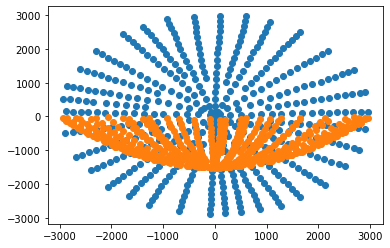

In [4]:
data = np.transpose(np.loadtxt("dish_zenith.txt")) #mm

plt.scatter(data[0], data[1]) #(x, y)
plt.scatter(data[0], data[2]) #(x, z)
# plt.scatter(data[1], data[2]) #(y, z)
plt.show()

#  noise covariance matrix??
# no noise, so just use I = N and ignore??
# but there is noise, we just don't know it

In [5]:
#for now just going to pretent it's centered at zero cause idk how to linearalize this

# z = a(x^2 + y^2) + z_0
def ls_Fit(x, y, z):
    nParam = 2

    #A_i = [x[i]^2 +y[i]^2, 1] (one row)
    A=np.zeros([len(x), nParam])
    A[:,1]=1.0
    for i in range(0, len(data[0])):
        A[i,0] = x[i]**2 + y[i]**2

    # print(A)

    A=np.matrix(A)
    d=np.matrix(z).transpose()

    lhs=A.transpose()*A
    rhs=A.transpose()*d

    # print(lhs)

    #gives m [[a], [m]]
    fittedParams= np.linalg.inv(lhs)*rhs

    predVals = A*fittedParams
    # print(predVals)

    #why is flatten not working here! too many dimensions come out
    val = []
    for i in predVals:
    #     print(i[0,0])
        val.append(i[0,0])
        
    return fittedParams.reshape(nParam), val

best fit parameters: [[ 1.66419499e-04 -1.51068759e+03]]


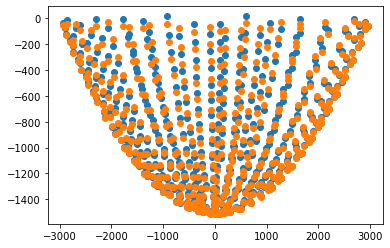

In [6]:
fittedParams, val = ls_Fit(data[0], data[1], data[2])
# print(fittedParams)

print("best fit parameters: {}".format(fittedParams))

# plt.scatter(data[0], data[1]) #(x, y)
plt.scatter(data[0], val) #(x, z)
plt.scatter(data[0], data[2]) #(x, z)

# plt.scatter(data[1], val) #(y, z)
plt.show()

#### c) 
Estimate the noise in the data, and from that, estimate the uncertainty in a. Our target focal length was 1.5 metres. What did we actually get, and what is the error bar? In case all facets of conic sections are not at your immediate recall, a parabola that goes through (0, 0) can be written as y = x^2 / (4f) where f is the focal length. When calculating the error bar for the focal length, feel free to approximate using a first-order Taylor expansion.

In [7]:
#like how we did it in class
rms = np.std(data[2] - val)
#how is noise and uncertainty different? should i have an error on my params then?




In [ ]:
#how to get focal length?? for parabola:
#y = x**2 / (4*f)
#but ours probably doesn't go exactly through [0, 0]